In [31]:
from __future__ import division

import numpy as np
import os
from glob import glob

from PIL import Image
from copy import deepcopy

from sklearn import linear_model, datasets, neighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm

%matplotlib inline
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import pandas as pd

import scipy.stats as stats
from scipy.stats import norm
import sklearn


In [33]:
X = pd.read_csv('./target_vs_competitor_similarity_trend_across_runs_by_roi.csv')

In [34]:
rois = np.unique(X.roi.values)
print 'Our ROIs:'
print rois

Our ROIs:
['EC' 'Fus' 'HC' 'IT' 'LOC' 'PHC' 'PRC' 'V1' 'V2']


In [35]:
X.groupby('roi')['slope'].mean()

roi
EC     0.002859
Fus    0.002278
HC     0.004494
IT     0.002625
LOC    0.000636
PHC    0.006652
PRC    0.002774
V1     0.000987
V2     0.001432
Name: slope, dtype: float64

0.00665248641304


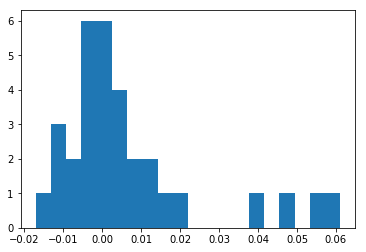

In [36]:
which_roi = 'PHC'
_X  = X[X['roi']==which_roi]
h = plt.hist(_X.slope,bins=20)
print np.mean(_X.slope)

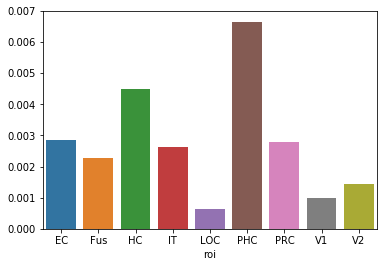

In [37]:
D = X.groupby('roi')['slope'].mean()
Y = pd.DataFrame(D)
sns.barplot(data=Y.transpose())

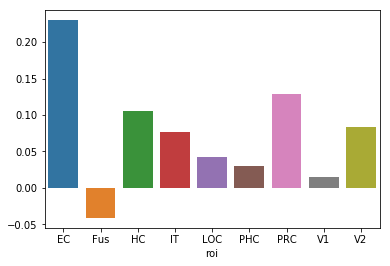

In [38]:
D = X.groupby('roi')['pearson'].mean()
Y = pd.DataFrame(D)
sns.barplot(data=Y.transpose())

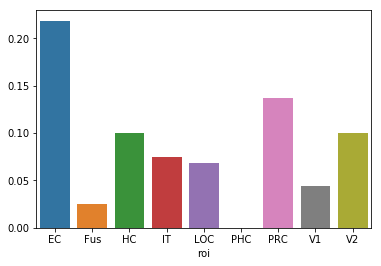

In [39]:
D = X.groupby('roi')['spearman'].mean()
Y = pd.DataFrame(D)
sns.barplot(data=Y.transpose())

In [50]:
def bootstrap_lt0(w,nIter=50000):
    boot = []
    for i in np.arange(nIter):
        boot.append(np.mean(np.random.choice(w,len(w),replace=True)))
    boot = np.array(boot) 
    p = sum(boot<0)/len(boot)*2
    print 'p = ' + str(sum(boot<0)/len(boot)*2)
    return boot, p

In [51]:
pearson_summary = []
for roi in rois:
    print roi
    _X = X[X['roi']==roi]
    boot,p = bootstrap_lt0(_X.pearson.values)
    pearson_summary.append(p)
    
spearman_summary = []
for roi in rois:
    print roi
    _X = X[X['roi']==roi]
    boot,p = bootstrap_lt0(_X.spearman.values)
    spearman_summary.append(p)   
    
slope_summary = []
for roi in rois:
    print roi
    _X = X[X['roi']==roi]
    boot,p = bootstrap_lt0(_X.slope.values)
    slope_summary.append(p)  

EC
p = 0.02124
Fus
p = 1.2898
HC
p = 0.24688
IT
p = 0.4046
LOC
p = 0.68592
PHC
p = 0.7672
PRC
p = 0.24504
V1
p = 0.8718
V2
p = 0.38512
EC
p = 0.02588
Fus
p = 0.80624
HC
p = 0.2662
IT
p = 0.44588
LOC
p = 0.48128
PHC
p = 0.99284
PRC
p = 0.20016
V1
p = 0.63832
V2
p = 0.32564
EC
p = 0.00408
Fus
p = 0.22508
HC
p = 0.0056
IT
p = 0.094
LOC
p = 0.61004
PHC
p = 0.02312
PRC
p = 0.12088
V1
p = 0.6444
V2
p = 0.3074


In [52]:
X = pd.DataFrame([rois,pearson_summary,spearman_summary,slope_summary])
X = X.transpose()
X.columns = ['roi','pearson','spearman','slope']

In [53]:
X

,roi,pearson,spearman,slope
0,EC,0.02124,0.02588,0.00408
1,Fus,1.2898,0.80624,0.22508
2,HC,0.24688,0.2662,0.0056
3,IT,0.4046,0.44588,0.094
4,LOC,0.68592,0.48128,0.61004
5,PHC,0.7672,0.99284,0.02312
6,PRC,0.24504,0.20016,0.12088
7,V1,0.8718,0.63832,0.6444
8,V2,0.38512,0.32564,0.3074
